# Predicting the Next Play


## Imports

## Prepare Data

In [31]:
from metaflow import Flow
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import xgboost
from sklearn.metrics import accuracy_score
run = Flow('NFLStatsFlow').latest_successful_run

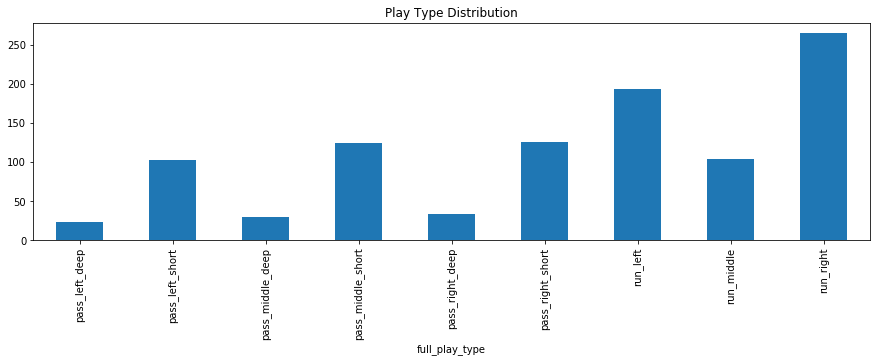

In [35]:
run.data.baltimore_df.groupby(['full_play_type'])['play_id'].count().plot.bar(
    title = 'Play Type Distribution',
    figsize=[15,4]
)

In [29]:
# PASS IN FULL FEATURE SET
final_df = run.data.baltimore_df[[
    'game_seconds_remaining',
    'yardline_100',
    'down',
    'ydstogo',
    'shotgun',
    'score_differential',
    'total_home_score',
    'total_away_score',
    'quarter_seconds_remaining',
    'half_seconds_remaining',
    'qtr',
    'goal_to_go',
    'no_huddle',
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'drive_yards_gained',
    'rushing_drive_yards_gained',
    'passing_drive_yards_gained',
    'drive_sacks',
    'drive_incomplete_pass',
    'drive_no_huddles',
    'drive_play_count',
    'previous_play_in_drive',
    'full_play_type'
]]

final_df= pandas.get_dummies(data=final_df, columns=['previous_play_in_drive'])
X = final_df.loc[:, final_df.columns != 'full_play_type']
Y = final_df.full_play_type

# Encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 13
test_size = 0.3

# Randomizing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

# Fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)

# Make predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate Predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model.feature_importances_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 25.58%
[0.03791097 0.03600078 0.04253586 0.04430486 0.03946358 0.03901507
 0.03502866 0.03279093 0.03824251 0.03688598 0.01622678 0.02401794
 0.0392074  0.03820004 0.03801461 0.02826465 0.03243734 0.04289711
 0.         0.03361348 0.02809442 0.03472419 0.         0.01678333
 0.03044547 0.02822274 0.03005103 0.01270979 0.0366294  0.03563701
 0.03505557 0.03658852]


In [29]:
run = Flow('NFLStatsFlow').latest_successful_run
# PASS IN FULL FEATURE SET
final_df = run.data.baltimore_df[[
    'game_seconds_remaining',
    'yardline_100',
    'down',
    'ydstogo',
    'shotgun',
    'score_differential',
    'total_home_score',
    'total_away_score',
    'quarter_seconds_remaining',
    'half_seconds_remaining',
    'qtr',
    'goal_to_go',
    'no_huddle',
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'drive_yards_gained',
    'rushing_drive_yards_gained',
    'passing_drive_yards_gained',
    'drive_sacks',
    'drive_incomplete_pass',
    'drive_no_huddles',
    'drive_play_count',
    'previous_play_in_drive',
    'full_play_type'
]]

final_df= pandas.get_dummies(data=final_df, columns=['previous_play_in_drive'])
X = final_df.loc[:, final_df.columns != 'full_play_type']
Y = final_df.full_play_type

# Encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 13
test_size = 0.3

# Randomizing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

# Fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)

# Make predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate Predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model.feature_importances_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 25.58%
[0.03791097 0.03600078 0.04253586 0.04430486 0.03946358 0.03901507
 0.03502866 0.03279093 0.03824251 0.03688598 0.01622678 0.02401794
 0.0392074  0.03820004 0.03801461 0.02826465 0.03243734 0.04289711
 0.         0.03361348 0.02809442 0.03472419 0.         0.01678333
 0.03044547 0.02822274 0.03005103 0.01270979 0.0366294  0.03563701
 0.03505557 0.03658852]


In [29]:
run = Flow('NFLStatsFlow').latest_successful_run
# PASS IN FULL FEATURE SET
final_df = run.data.baltimore_df[[
    'game_seconds_remaining',
    'yardline_100',
    'down',
    'ydstogo',
    'shotgun',
    'score_differential',
    'total_home_score',
    'total_away_score',
    'quarter_seconds_remaining',
    'half_seconds_remaining',
    'qtr',
    'goal_to_go',
    'no_huddle',
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'drive_yards_gained',
    'rushing_drive_yards_gained',
    'passing_drive_yards_gained',
    'drive_sacks',
    'drive_incomplete_pass',
    'drive_no_huddles',
    'drive_play_count',
    'previous_play_in_drive',
    'full_play_type'
]]

final_df= pandas.get_dummies(data=final_df, columns=['previous_play_in_drive'])
X = final_df.loc[:, final_df.columns != 'full_play_type']
Y = final_df.full_play_type

# Encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 13
test_size = 0.3

# Randomizing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

# Fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)

# Make predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate Predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model.feature_importances_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 25.58%
[0.03791097 0.03600078 0.04253586 0.04430486 0.03946358 0.03901507
 0.03502866 0.03279093 0.03824251 0.03688598 0.01622678 0.02401794
 0.0392074  0.03820004 0.03801461 0.02826465 0.03243734 0.04289711
 0.         0.03361348 0.02809442 0.03472419 0.         0.01678333
 0.03044547 0.02822274 0.03005103 0.01270979 0.0366294  0.03563701
 0.03505557 0.03658852]
